# Setup

In [1]:
# Import libraries
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
import ultralytics
from ultralytics import YOLO
from torch.utils.data import DataLoader, WeightedRandomSampler, Dataset
import cv2
import random
import shutil
from torchvision.datasets import CocoDetection
from torchvision.transforms import functional as F
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.retinanet import RetinaNet
import torch
from torchvision.models.detection import RetinaNet
import torchvision.transforms as T
from glob import glob
import pandas as pd
import yaml
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
from torchvision.models.detection.retinanet import RetinaNetClassificationHead
import datetime
from PIL import Image, ImageDraw
import csv
from torchvision.ops import nms
import torch.optim as optim
from torchvision.datasets import VOCDetection
from pathlib import Path
from torchvision import transforms
from torchvision.datasets import CocoDetection
from torchvision.models.detection import retinanet_resnet50_fpn, RetinaNet_ResNet50_FPN_Weights

In [2]:
# Use cuda device
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")
ultralytics.checks()

#@title Select YOLO11 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

Ultralytics 8.3.141  Python-3.12.9 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Setup complete  (20 CPUs, 15.7 GB RAM, 407.3/475.7 GB disk)
Note: you may need to restart the kernel to use updated packages.


COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


 Result of Adam:

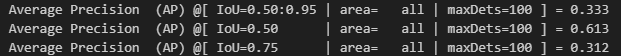

Result of AdamW:


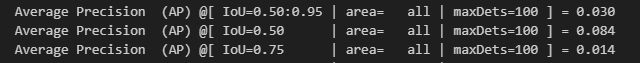

Result of SGD:

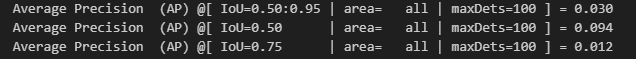

The best mAP for Retinanet is 0.613

# Different Deep Learning Models

## YOLOv11

### Base Model

In [3]:
model_YOLO1 = YOLO('yolo11s.pt')  
results = model_YOLO1.train(
    data=r'C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\data.yaml', 
    epochs=10,
)

Ultralytics 8.3.141  Python-3.12.9 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train339, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/lancemontojo/general/9afc3ecf87f94da696a500de73e8a426

COMET INFO: Couldn't find a Git repository in 'c:\\Users\\Jerome\\anaconda3\\CPE313_MONTOJO' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET WARNING: Unknown error exporting current conda environment
COMET WARNING: Unknown error retrieving Conda package as an explicit file
COMET WARNING: Unknown error retrieving Conda information


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 
train: Fast image access  (ping: 0.10.0 ms, read: 13.96.9 MB/s, size: 33.8 KB)


train: Scanning C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\train\labels.cache... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 13.24.4 MB/s, size: 20.1 KB)


val: Scanning C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\valid\labels.cache... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]


Plotting labels to runs\detect\train339\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train339
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.94G      1.596      6.416       2.17         17        640: 100%|██████████| 34/34 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]

                   all        231        264      0.156      0.248      0.107     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.01G      1.744      2.816      2.338         19        640: 100%|██████████| 34/34 [00:07<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]

                   all        231        264      0.043     0.0794     0.0342     0.0127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.02G       1.98      2.575      2.551         20        640: 100%|██████████| 34/34 [00:07<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]

                   all        231        264     0.0246      0.228     0.0132    0.00393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.02G      2.019      2.542      2.544         17        640: 100%|██████████| 34/34 [00:07<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.11it/s]

                   all        231        264     0.0485     0.0255      0.012    0.00396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.01G      1.921      2.286      2.449         18        640: 100%|██████████| 34/34 [00:08<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.02it/s]

                   all        231        264      0.238      0.238      0.125     0.0406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.02G      1.741      2.067      2.267         16        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.02it/s]

                   all        231        264      0.194      0.267      0.177      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.01G      1.634      1.998      2.151         16        640: 100%|██████████| 34/34 [00:08<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.41it/s]

                   all        231        264      0.382      0.432      0.372      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.02G       1.59      1.786      2.078         18        640: 100%|██████████| 34/34 [00:08<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]

                   all        231        264      0.485       0.45      0.445       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.01G      1.574      1.683      2.055         16        640: 100%|██████████| 34/34 [00:07<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]

                   all        231        264      0.571      0.497      0.519      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.02G      1.471      1.608       1.96         16        640: 100%|██████████| 34/34 [00:07<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]

                   all        231        264       0.55      0.487      0.531      0.276



10 epochs completed in 0.039 hours.
Optimizer stripped from runs\detect\train339\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train339\weights\best.pt, 19.2MB

Validating runs\detect\train339\weights\best.pt...
Ultralytics 8.3.141  Python-3.12.9 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]


                   all        231        264       0.55      0.484      0.531      0.278
               Class B        128        157      0.505      0.408      0.442      0.221
               Class F        105        107      0.594      0.561       0.62      0.334
Speed: 0.4ms preprocess, 4.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\train339


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : dry_orca_355
COMET INFO:     url                   : https://www.comet.com/lancemontojo/general/9afc3ecf87f94da696a500de73e8a426
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [11]               : (0.00018170299999999996, 0.0013238268039215688)
COMET INFO:     lr/pg1 [11]               : (0.00018170299999999996, 0.0013238268039215688)
COMET INFO:     lr/pg2 [11]               : (0.00018170299999999996, 0.0013238268039215688)
COMET INFO:     metrics/mAP50(B) [11]     : (0.012, 0.5311832177138651)
COMET INFO:     metrics/mAP50-95(B) [11]  : (0.00393, 0.27762278153311176)
COMET INFO:     metrics/precision(B) [11] : (0.02457, 0.57077)
C

### Increase epochs

In [3]:
model_YOLO1 = YOLO(r'C:\Users\Jerome\anaconda3\CPE313_MONTOJO\runs\detect\train352\weights\best.pt')  
results = model_YOLO1.train(
    data=r'C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\data.yaml', 
    epochs=100,
)

New https://pypi.org/project/ultralytics/8.3.142 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.141  Python-3.12.9 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=C:\Users\Jerome\anaconda3\CPE313_MONTOJO\runs\detect\train352\w

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/lancemontojo/general/86cd9ec561a243fb831faf2c3129b564

COMET INFO: Couldn't find a Git repository in 'c:\\Users\\Jerome\\anaconda3\\CPE313_MONTOJO' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET WARNING: Unknown error exporting current conda environment
COMET WARNING: Unknown error retrieving Conda package as an explicit file
COMET WARNING: Unknown error retrieving Conda information


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 
train: Fast image access  (ping: 0.00.0 ms, read: 35.09.6 MB/s, size: 33.8 KB)


train: Scanning C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\train\labels.cache... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 29.716.2 MB/s, size: 20.1 KB)


val: Scanning C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\valid\labels.cache... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]


Plotting labels to runs\detect\train353\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train353
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.94G      1.064       1.09       1.45         36        640: 100%|██████████| 34/34 [00:12<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]

                   all        231        264      0.785      0.716      0.814      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.01G     0.9863     0.9641      1.379         38        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

                   all        231        264      0.691      0.744      0.783      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.02G      1.159      1.055      1.492         44        640: 100%|██████████| 34/34 [00:07<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.32it/s]

                   all        231        264      0.716      0.689      0.775      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.02G      1.206      1.149      1.541         42        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.33it/s]

                   all        231        264      0.718      0.679      0.744      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.01G      1.175      1.132      1.512         39        640: 100%|██████████| 34/34 [00:06<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

                   all        231        264      0.731      0.599      0.715      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.02G      1.212      1.149      1.555         39        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        231        264      0.745      0.633      0.718      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.01G      1.216      1.222      1.567         39        640: 100%|██████████| 34/34 [00:06<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        231        264      0.638      0.548      0.569       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.02G      1.201      1.166      1.538         44        640: 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.15it/s]

                   all        231        264      0.668      0.669      0.711      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.01G      1.146        1.1      1.498         42        640: 100%|██████████| 34/34 [00:06<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.90it/s]

                   all        231        264      0.706      0.669       0.74      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.02G      1.176      1.142      1.522         34        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        231        264      0.719      0.578      0.676      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.01G      1.232       1.17      1.563         43        640: 100%|██████████| 34/34 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]

                   all        231        264      0.736      0.619      0.699        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.02G      1.252      1.153      1.579         40        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

                   all        231        264       0.77      0.711      0.764      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.01G      1.239       1.18      1.578         35        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        231        264      0.677      0.715      0.729      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.02G      1.253      1.226      1.574         49        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

                   all        231        264      0.744      0.614      0.735       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.01G      1.233      1.158      1.561         49        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        231        264      0.715      0.632      0.747       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.02G      1.213      1.155      1.561         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]

                   all        231        264      0.708      0.646      0.688      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.01G      1.188      1.134      1.552         32        640: 100%|██████████| 34/34 [00:06<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

                   all        231        264      0.756      0.685      0.788      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.02G      1.195      1.167      1.524         37        640: 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.92it/s]

                   all        231        264      0.718      0.638      0.714       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.01G      1.181      1.104      1.542         44        640: 100%|██████████| 34/34 [00:07<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

                   all        231        264      0.721       0.71      0.737      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.02G      1.164      1.083      1.512         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.02it/s]

                   all        231        264      0.779      0.727      0.798      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.01G      1.178      1.124      1.523         42        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.10it/s]

                   all        231        264      0.719      0.688      0.747      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.02G       1.13      1.082      1.475         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        231        264      0.779      0.668      0.769      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.01G      1.189      1.118      1.523         52        640: 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

                   all        231        264      0.804      0.727      0.793      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.02G      1.164      1.101      1.516         32        640: 100%|██████████| 34/34 [00:07<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

                   all        231        264      0.719      0.652      0.731      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.01G      1.153      1.085      1.489         42        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        231        264      0.611      0.675      0.658      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.02G      1.107       1.04      1.455         42        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.88it/s]

                   all        231        264      0.747      0.659      0.723      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.01G      1.147      1.102      1.509         38        640: 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        231        264       0.76      0.712      0.754      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.02G      1.171      1.094      1.503         41        640: 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.31it/s]

                   all        231        264        0.8      0.706      0.799      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.01G      1.104      1.006      1.448         39        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.30it/s]

                   all        231        264      0.787      0.668       0.78      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.02G      1.121      1.024      1.482         43        640: 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]

                   all        231        264      0.758      0.727      0.789      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.01G       1.12       1.01      1.449         42        640: 100%|██████████| 34/34 [00:06<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

                   all        231        264      0.785      0.683      0.792      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.05G      1.089      1.024      1.455         39        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        231        264      0.801      0.727      0.837      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.01G      1.128      1.033      1.481         49        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.23it/s]

                   all        231        264      0.769      0.659      0.765      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.02G      1.106      0.993      1.465         44        640: 100%|██████████| 34/34 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.23it/s]

                   all        231        264       0.85       0.75      0.856      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.01G       1.11       1.03      1.466         35        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.31it/s]

                   all        231        264      0.869      0.708      0.843      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.02G      1.122      1.003      1.504         35        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.97it/s]

                   all        231        264      0.791      0.762      0.841      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.01G      1.123      0.997      1.469         44        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

                   all        231        264      0.782      0.805      0.865      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.02G      1.124     0.9812      1.485         47        640: 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        231        264      0.785       0.77      0.829      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.01G      1.071     0.9466      1.442         38        640: 100%|██████████| 34/34 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]

                   all        231        264      0.743      0.678      0.775       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.02G      1.093     0.9637      1.469         44        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.30it/s]

                   all        231        264      0.774      0.719      0.807      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.01G      1.097     0.9689      1.449         38        640: 100%|██████████| 34/34 [00:06<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        231        264      0.808      0.744      0.825      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.02G      1.068     0.9717      1.452         34        640: 100%|██████████| 34/34 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        231        264      0.831       0.67      0.796      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.01G       1.05     0.9649      1.429         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        231        264      0.776      0.769      0.853       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.02G      1.064     0.9341      1.423         44        640: 100%|██████████| 34/34 [00:06<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

                   all        231        264      0.789      0.737       0.84      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.01G      1.074     0.9297      1.427         38        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

                   all        231        264      0.811      0.736      0.825      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.04G      1.062     0.9095      1.429         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        231        264      0.845      0.746      0.841      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.01G      1.097     0.9593      1.453         52        640: 100%|██████████| 34/34 [00:07<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.82it/s]

                   all        231        264      0.842      0.732       0.85      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.02G      1.052     0.9109      1.425         36        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        231        264      0.799      0.776      0.858      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.01G       1.06     0.9568      1.452         39        640: 100%|██████████| 34/34 [00:06<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

                   all        231        264      0.837       0.72       0.85       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.02G      1.013     0.9336      1.418         38        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        231        264      0.842      0.735      0.856      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.01G       1.02     0.8945      1.411         39        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        231        264      0.778      0.771      0.827      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.02G      1.028     0.8805      1.438         43        640: 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.31it/s]

                   all        231        264      0.725       0.69      0.794      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.01G      1.039     0.9147      1.409         40        640: 100%|██████████| 34/34 [00:06<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        231        264      0.869      0.746      0.845      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.02G      1.001      0.868      1.391         40        640: 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.23it/s]

                   all        231        264      0.889      0.772      0.881      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.01G     0.9958     0.8939      1.377         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

                   all        231        264      0.787      0.792      0.849      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.02G     0.9913      0.841      1.373         36        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

                   all        231        264      0.868      0.745      0.841      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.01G      1.013      0.887      1.382         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        231        264      0.813      0.834      0.872      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.02G     0.9604      0.808      1.372         41        640: 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.25it/s]

                   all        231        264      0.876      0.783      0.887      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.01G     0.9656     0.8439      1.371         40        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.21it/s]

                   all        231        264      0.834      0.774      0.871      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.02G     0.9854     0.8415      1.381         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]

                   all        231        264      0.851        0.8      0.884      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.01G     0.9619     0.8312      1.367         36        640: 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

                   all        231        264       0.85      0.749      0.835      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.02G      0.977     0.8497       1.39         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.16it/s]

                   all        231        264       0.83      0.792      0.881      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.01G     0.9714     0.8567      1.389         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]

                   all        231        264      0.784      0.778       0.84      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.02G     0.9299      0.779       1.34         41        640: 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.31it/s]

                   all        231        264      0.894      0.728      0.869      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.01G     0.9558     0.7666      1.343         41        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]

                   all        231        264      0.893      0.809        0.9      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.02G     0.9755     0.8135      1.367         35        640: 100%|██████████| 34/34 [00:07<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.85it/s]

                   all        231        264      0.909      0.821      0.906      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.01G     0.9237     0.7563      1.328         42        640: 100%|██████████| 34/34 [00:07<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        231        264      0.898      0.812      0.906      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.02G     0.9667     0.7808      1.357         31        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        231        264      0.887      0.812      0.912      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.01G     0.9845     0.8058      1.366         35        640: 100%|██████████| 34/34 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]

                   all        231        264      0.847      0.771      0.877      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.02G     0.9276     0.7449      1.314         35        640: 100%|██████████| 34/34 [00:07<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.21it/s]

                   all        231        264      0.862      0.797      0.889       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.01G     0.9563     0.7853      1.356         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.32it/s]

                   all        231        264      0.879      0.781      0.884      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.02G       0.93     0.7671      1.334         29        640: 100%|██████████| 34/34 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.25it/s]

                   all        231        264       0.89      0.791      0.905      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.01G     0.9196     0.7891      1.336         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]

                   all        231        264      0.862      0.808      0.896       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.02G     0.9389      0.781      1.341         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.16it/s]

                   all        231        264       0.85      0.814      0.898      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.01G     0.8931     0.7248      1.309         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        231        264      0.883      0.786      0.896      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.02G     0.8894     0.7404      1.322         41        640: 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.21it/s]

                   all        231        264      0.874        0.8      0.892      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.01G     0.9005     0.7151      1.312         33        640: 100%|██████████| 34/34 [00:06<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        231        264      0.894      0.802      0.907      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.02G     0.8652     0.7329      1.301         39        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.21it/s]

                   all        231        264      0.857      0.809      0.896      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.01G      0.905     0.7408      1.336         41        640: 100%|██████████| 34/34 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

                   all        231        264      0.801      0.841       0.89      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.02G     0.9041     0.7325      1.319         43        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

                   all        231        264      0.837      0.823      0.889      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.01G     0.8656      0.688      1.285         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        231        264      0.835      0.857      0.917      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.02G     0.8936     0.7314      1.305         33        640: 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.77it/s]

                   all        231        264      0.843      0.865      0.915       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.01G     0.8874     0.7325      1.314         42        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]

                   all        231        264      0.865      0.845      0.908      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.02G     0.8577     0.6912      1.294         41        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]

                   all        231        264       0.92       0.81      0.909      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.01G     0.8717     0.7064      1.302         41        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.15it/s]

                   all        231        264      0.918      0.824      0.919       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.02G     0.8621     0.7121      1.299         45        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.12it/s]

                   all        231        264      0.914       0.83      0.916      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.01G     0.8442     0.6752      1.279         35        640: 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.13it/s]

                   all        231        264      0.905      0.817      0.908      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.02G     0.8393     0.6784      1.268         40        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        231        264      0.906      0.837      0.918      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.01G      0.879     0.6941      1.298         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        231        264      0.876      0.856      0.916      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.02G     0.8605     0.7074      1.294         37        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]

                   all        231        264      0.866      0.833      0.899      0.615


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.01G     0.7613     0.5896      1.315         19        640: 100%|██████████| 34/34 [00:07<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]

                   all        231        264      0.854      0.834      0.894        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.02G      0.758      0.519      1.332         18        640: 100%|██████████| 34/34 [00:06<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        231        264      0.875      0.818      0.894      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.01G     0.7185     0.4892      1.285         17        640: 100%|██████████| 34/34 [00:06<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.13it/s]

                   all        231        264      0.895      0.793        0.9      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.02G     0.7064     0.4644      1.284         19        640: 100%|██████████| 34/34 [00:06<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]

                   all        231        264        0.9       0.79      0.896      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.01G     0.6917     0.4628      1.264         16        640: 100%|██████████| 34/34 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        231        264      0.859      0.846        0.9      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.02G     0.6991     0.4594      1.261         16        640: 100%|██████████| 34/34 [00:06<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        231        264      0.882      0.833      0.908      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.01G     0.6802     0.4418      1.256         20        640: 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.13it/s]

                   all        231        264       0.88      0.835      0.903      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.02G     0.6908     0.4429       1.25         17        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.10it/s]

                   all        231        264      0.907      0.812      0.906      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.01G     0.6482     0.4506      1.221         18        640: 100%|██████████| 34/34 [00:07<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.32it/s]

                   all        231        264      0.858      0.832      0.903      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.02G     0.6807     0.4401      1.251         17        640: 100%|██████████| 34/34 [00:07<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.25it/s]

                   all        231        264       0.86      0.843      0.908       0.63



100 epochs completed in 0.270 hours.
Optimizer stripped from runs\detect\train353\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train353\weights\best.pt, 19.2MB

Validating runs\detect\train353\weights\best.pt...
Ultralytics 8.3.141  Python-3.12.9 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]


                   all        231        264       0.86      0.843      0.908       0.63
               Class B        128        157      0.867      0.732      0.861      0.598
               Class F        105        107      0.853      0.953      0.955      0.662
Speed: 0.3ms preprocess, 4.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\train353


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : solid_shed_9972
COMET INFO:     url                   : https://www.comet.com/lancemontojo/general/86cd9ec561a243fb831faf2c3129b564
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [101]               : (3.3173300000000017e-05, 0.001617973856862745)
COMET INFO:     lr/pg1 [101]               : (3.3173300000000017e-05, 0.001617973856862745)
COMET INFO:     lr/pg2 [101]               : (3.3173300000000017e-05, 0.001617973856862745)
COMET INFO:     metrics/mAP50(B) [101]     : (0.56863, 0.91943)
COMET INFO:     metrics/mAP50-95(B) [101]  : (0.28028, 0.6299021500055871)
COMET INFO:     metrics/precision(B) [101] : (0.61132, 0.92006)
COMET

### Hyperparameter Tuning

#### Best Hyperparameters

In [3]:
model_YOLO2 = YOLO('yolo11s.pt')  
best_hyperparameters = model_YOLO2.tune(
    data=r'C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\data.yaml',
    epochs=10,
    iterations=10,
    space={
        # Optimizer params
        'lr0': [0.0005, 0.01],
        'lrf': [0.01, 0.2],
        'momentum': [0.85, 0.98],
        'weight_decay': [0.00005, 0.002],
        'warmup_epochs': [1.0, 5.0],
        'warmup_momentum': [0.4, 0.95],

        # Data augmentation
        'degrees': [0.0, 10.0],
        'translate': [0.0, 0.2],
        'scale': [0.4, 0.8],
        'shear': [0.0, 5.0],
        'perspective': [0.0, 0.001],
        'flipud': [0.0, 0.2],
        'fliplr': [0.0, 0.5],
        'mosaic': [0.5, 1.0],
        'mixup': [0.0, 0.3],
        'copy_paste': [0.0, 0.3],
    }
)


Tuner: Initialized Tuner instance with 'tune_dir=runs\detect\tune43'
Tuner:  Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Saved runs\detect\tune43\tune_scatter_plots.png
Saved runs\detect\tune43\tune_fitness.png

Tuner: 1/10 iterations complete  (436.39s)
Tuner: Results saved to runs\detect\tune43
Tuner: Best fitness=0.30137 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.5499, 'metrics/recall(B)': 0.48705, 'metrics/mAP50(B)': 0.53107, 'metrics/mAP50-95(B)': 0.27585, 'val/box_loss': 1.6973, 'val/cls_loss': 1.84249, 'val/dfl_loss': 2.08793, 'fitness': 0.30137}
Tuner: Best fitness model is runs\d

In [4]:
import yaml

with open(r'C:\Users\Jerome\anaconda3\CPE313_MONTOJO\runs\detect\tune43\best_hyperparameters.yaml', 'r') as f:
    best_hyp = yaml.safe_load(f)

print("Best hyperparameters found:")
for k, v in best_hyp.items():
    print(f"{k}: {v}")

Best hyperparameters found:
lr0: 0.00913
lrf: 0.01
momentum: 0.89545
weight_decay: 0.00057
warmup_epochs: 3.13637
warmup_momentum: 0.95
degrees: 0.0
translate: 0.09415
scale: 0.49374
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.3394
mosaic: 0.89799
mixup: 0.0
copy_paste: 0.0


#### Training with best parameters

In [3]:
model_YOLO2 = YOLO(r'C:\Users\Jerome\anaconda3\CPE313_MONTOJO\runs\detect\train353\weights\best.pt')

results_2 = model_YOLO2.train(
    data=r'C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\data.yaml', 
    epochs=100,  # Total number of epochs, 
    imgsz=640,  # Image size

    # Best hyperparameters from tuning
    lr0=0.00913,
    lrf=0.01,
    momentum=0.89545,
    weight_decay=0.00057,
    warmup_epochs=3.13637,
    warmup_momentum=0.95,
    degrees=0.0,
    translate=0.09415,
    scale=0.49374,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.3394,
    mosaic=0.89799,
    mixup=0.0,
    copy_paste=0.0,
    
    optimizer='SGD', 
    cos_lr=True  
)


New https://pypi.org/project/ultralytics/8.3.142 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.141  Python-3.12.9 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.3394, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.00913, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=C:\Users\Jerome\anaconda3\CPE313_MONTOJO\runs\detect\train

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/lancemontojo/general/3e1ce40e5e0d4e35918852ac4fc039db

COMET INFO: Couldn't find a Git repository in 'c:\\Users\\Jerome\\anaconda3\\CPE313_MONTOJO' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET WARNING: Unknown error exporting current conda environment
COMET WARNING: Unknown error retrieving Conda package as an explicit file
COMET WARNING: Unknown error retrieving Conda information


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 
train: Fast image access  (ping: 0.00.0 ms, read: 35.723.3 MB/s, size: 33.8 KB)


train: Scanning C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\train\labels.cache... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 30.910.4 MB/s, size: 20.1 KB)


val: Scanning C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\valid\labels.cache... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]


Plotting labels to runs\detect\train368\labels.jpg... 
optimizer: SGD(lr=0.00913, momentum=0.89545) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00057), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train368
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.92G     0.9075     0.8032      1.331         41        640: 100%|██████████| 34/34 [00:11<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]

                   all        231        264      0.779      0.649      0.659      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.96G     0.9625     0.8204      1.363         34        640: 100%|██████████| 34/34 [00:07<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.96it/s]

                   all        231        264      0.747      0.649      0.704      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.97G     0.9744     0.8489      1.369         45        640: 100%|██████████| 34/34 [00:07<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.92it/s]

                   all        231        264      0.726      0.707      0.781      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.96G      1.019     0.8727      1.396         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.02it/s]

                   all        231        264      0.871      0.761      0.846      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.97G     0.9679     0.8213      1.345         44        640: 100%|██████████| 34/34 [00:06<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.84it/s]

                   all        231        264      0.844      0.803      0.872      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.96G     0.9903     0.8587      1.356         34        640: 100%|██████████| 34/34 [00:06<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]

                   all        231        264      0.865      0.746      0.845       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.97G     0.9878     0.7935      1.365         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        231        264      0.742      0.632      0.689      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.96G     0.9849     0.8341      1.359         33        640: 100%|██████████| 34/34 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        231        264      0.822      0.782      0.838      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.97G      1.008     0.8276      1.371         30        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

                   all        231        264      0.865       0.78      0.871      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.96G      1.008     0.8351      1.374         29        640: 100%|██████████| 34/34 [00:07<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        231        264      0.836      0.715      0.845      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.97G     0.9854     0.8313      1.362         31        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.97it/s]

                   all        231        264      0.828      0.797      0.868      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.96G     0.9582     0.7908      1.346         29        640: 100%|██████████| 34/34 [00:07<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        231        264       0.88      0.829      0.904        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.97G     0.9511     0.7942      1.336         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.68it/s]

                   all        231        264      0.799       0.78      0.836      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.96G     0.9423     0.8151      1.346         34        640: 100%|██████████| 34/34 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.75it/s]

                   all        231        264      0.852      0.714      0.839      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.97G     0.9604     0.7924      1.329         41        640: 100%|██████████| 34/34 [00:07<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        231        264      0.876      0.689      0.836      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.96G      0.973     0.7847      1.344         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.91it/s]

                   all        231        264      0.851      0.751      0.842      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.97G     0.9446     0.7555      1.329         41        640: 100%|██████████| 34/34 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.86it/s]

                   all        231        264      0.883      0.785      0.878      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.96G     0.9812     0.8116      1.366         42        640: 100%|██████████| 34/34 [00:07<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.66it/s]

                   all        231        264      0.838      0.745       0.83      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.97G     0.9717     0.8156      1.352         42        640: 100%|██████████| 34/34 [00:07<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.88it/s]

                   all        231        264      0.613      0.438      0.443      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.96G     0.9495     0.7853      1.349         34        640: 100%|██████████| 34/34 [00:07<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        231        264      0.877      0.708      0.836      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.97G     0.9429     0.7727       1.34         49        640: 100%|██████████| 34/34 [00:07<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.81it/s]

                   all        231        264      0.873      0.793      0.889      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.96G     0.9222     0.7541      1.304         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]

                   all        231        264      0.899      0.753      0.885        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.97G     0.9434     0.8029      1.331         32        640: 100%|██████████| 34/34 [00:07<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

                   all        231        264      0.858      0.756      0.847      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.96G       0.96     0.7951      1.341         43        640: 100%|██████████| 34/34 [00:07<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.79it/s]

                   all        231        264      0.812      0.656      0.779      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.97G     0.9288     0.7776      1.332         35        640: 100%|██████████| 34/34 [00:07<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.76it/s]

                   all        231        264      0.897       0.78      0.872       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.96G     0.9546     0.7725      1.326         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.84it/s]

                   all        231        264      0.857      0.803      0.875      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.97G     0.8953     0.7555      1.294         39        640: 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.88it/s]

                   all        231        264      0.824      0.796      0.853      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.96G     0.9246     0.7663      1.317         41        640: 100%|██████████| 34/34 [00:07<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.98it/s]

                   all        231        264      0.842      0.811       0.89       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.96G     0.9224     0.7501      1.323         34        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.88it/s]

                   all        231        264      0.833      0.797       0.87      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.96G     0.9233      0.752      1.313         41        640: 100%|██████████| 34/34 [00:07<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.87it/s]

                   all        231        264      0.834      0.793      0.878      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.97G     0.9342     0.7289      1.329         45        640: 100%|██████████| 34/34 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.96it/s]

                   all        231        264      0.822      0.799      0.861      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.96G       0.93     0.7363      1.332         34        640: 100%|██████████| 34/34 [00:07<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        231        264      0.826      0.738      0.838      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.97G     0.9018     0.7205      1.294         32        640: 100%|██████████| 34/34 [00:07<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.64it/s]

                   all        231        264      0.869      0.803      0.888      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.96G     0.8995      0.735      1.326         34        640: 100%|██████████| 34/34 [00:07<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.72it/s]

                   all        231        264      0.864      0.829      0.897      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.97G     0.8853     0.6983      1.306         31        640: 100%|██████████| 34/34 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]

                   all        231        264      0.909      0.821      0.897      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.96G     0.9048     0.7362      1.315         40        640: 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        231        264      0.847       0.84      0.882      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.97G     0.8907     0.6957      1.281         35        640: 100%|██████████| 34/34 [00:08<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.92it/s]

                   all        231        264       0.87      0.764      0.861      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.96G      0.912     0.7418      1.326         48        640: 100%|██████████| 34/34 [00:08<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]

                   all        231        264      0.828      0.839      0.901      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.97G     0.9333     0.7414      1.319         39        640: 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all        231        264       0.83      0.834      0.883      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.96G      0.873     0.7208      1.285         38        640: 100%|██████████| 34/34 [00:09<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all        231        264       0.91      0.818      0.902      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.97G     0.8676     0.7071      1.301         38        640: 100%|██████████| 34/34 [00:10<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all        231        264      0.866       0.81      0.888        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.96G     0.8992     0.7247      1.298         35        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]

                   all        231        264      0.877      0.834      0.891      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.97G     0.8774     0.7169      1.295         45        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.49it/s]

                   all        231        264      0.929      0.797        0.9      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.97G     0.8737     0.7097      1.291         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.69it/s]

                   all        231        264       0.88      0.801      0.897      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.97G     0.8702      0.684      1.278         32        640: 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.72it/s]

                   all        231        264      0.878      0.784      0.888      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.96G     0.8736     0.6929      1.291         32        640: 100%|██████████| 34/34 [00:07<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all        231        264      0.878      0.801       0.88      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.97G     0.8742     0.6948      1.293         30        640: 100%|██████████| 34/34 [00:07<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all        231        264      0.895      0.818      0.882      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.96G     0.8477     0.6702      1.278         32        640: 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.77it/s]

                   all        231        264      0.911      0.821       0.91      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.97G     0.8288     0.6757      1.275         34        640: 100%|██████████| 34/34 [00:07<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.87it/s]

                   all        231        264      0.898      0.836      0.913      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.96G     0.8439     0.6697      1.282         39        640: 100%|██████████| 34/34 [00:07<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]

                   all        231        264      0.896      0.831      0.912      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.97G     0.8461     0.6779      1.268         50        640: 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.31it/s]

                   all        231        264      0.895      0.815      0.903      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.96G     0.8421     0.6661      1.275         47        640: 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]

                   all        231        264      0.894      0.828      0.912      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.97G     0.8342     0.6539      1.274         43        640: 100%|██████████| 34/34 [00:08<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]

                   all        231        264      0.869      0.851      0.914      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.96G     0.8688     0.6975      1.288         40        640: 100%|██████████| 34/34 [00:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]

                   all        231        264      0.877      0.833      0.908      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.97G     0.8141     0.6683      1.255         35        640: 100%|██████████| 34/34 [00:09<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]

                   all        231        264      0.837      0.845      0.892        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.96G     0.8395     0.6746      1.273         43        640: 100%|██████████| 34/34 [00:09<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]

                   all        231        264      0.892      0.791      0.884      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.97G     0.8066     0.6671      1.268         34        640: 100%|██████████| 34/34 [00:09<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]

                   all        231        264      0.842      0.841        0.9      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.96G     0.8206     0.6693      1.259         44        640: 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]

                   all        231        264      0.919      0.806      0.907      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.97G     0.8269     0.6496      1.266         42        640: 100%|██████████| 34/34 [00:09<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.91it/s]

                   all        231        264      0.859      0.856      0.912      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.96G     0.8081     0.6527      1.262         36        640: 100%|██████████| 34/34 [00:10<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

                   all        231        264      0.877      0.858       0.92      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.97G     0.8128     0.6425      1.247         38        640: 100%|██████████| 34/34 [00:11<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]

                   all        231        264      0.898      0.829      0.917      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.96G     0.8274     0.6649      1.272         32        640: 100%|██████████| 34/34 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]

                   all        231        264      0.883      0.844       0.91      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.97G     0.8057     0.6425      1.245         45        640: 100%|██████████| 34/34 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]

                   all        231        264      0.903      0.856      0.907      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.96G     0.7918      0.628      1.246         36        640: 100%|██████████| 34/34 [00:11<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]

                   all        231        264      0.896      0.849      0.913      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.97G     0.7961     0.6126      1.241         33        640: 100%|██████████| 34/34 [00:11<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]

                   all        231        264      0.852      0.856      0.903      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.96G     0.7524     0.6137      1.231         41        640: 100%|██████████| 34/34 [00:11<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        231        264       0.88      0.847      0.902      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.97G     0.7824     0.6184      1.232         38        640: 100%|██████████| 34/34 [00:08<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        231        264      0.888      0.851      0.918      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.96G     0.7692     0.6171      1.233         32        640: 100%|██████████| 34/34 [00:09<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.04it/s]

                   all        231        264      0.874      0.849      0.911      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.99G      0.802      0.627      1.248         35        640: 100%|██████████| 34/34 [00:09<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        231        264      0.888      0.829      0.905      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.96G     0.7976     0.6334      1.247         37        640: 100%|██████████| 34/34 [00:09<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all        231        264      0.891      0.821      0.906      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.97G     0.7631      0.614      1.229         35        640: 100%|██████████| 34/34 [00:08<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]

                   all        231        264      0.882      0.843      0.904      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.96G     0.7907     0.6427       1.25         45        640: 100%|██████████| 34/34 [00:07<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]

                   all        231        264      0.882      0.848      0.917      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.97G     0.7677     0.6172      1.219         38        640: 100%|██████████| 34/34 [00:09<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]

                   all        231        264      0.849      0.864      0.908       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.96G     0.7719     0.6181      1.226         37        640: 100%|██████████| 34/34 [00:09<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]

                   all        231        264      0.882      0.856       0.91       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.97G     0.7845     0.6128       1.23         47        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all        231        264      0.885      0.846      0.917      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.96G     0.7613      0.591      1.227         35        640: 100%|██████████| 34/34 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        231        264      0.887      0.849      0.919      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.97G     0.7581      0.605      1.214         41        640: 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]

                   all        231        264      0.875      0.856      0.913       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.96G     0.7994     0.6271      1.254         33        640: 100%|██████████| 34/34 [00:10<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        231        264      0.899      0.836      0.914      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.97G     0.7694     0.6099      1.227         43        640: 100%|██████████| 34/34 [00:11<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]

                   all        231        264      0.886       0.84      0.922      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.96G     0.7578     0.6018      1.225         37        640: 100%|██████████| 34/34 [00:11<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all        231        264      0.896      0.832      0.914      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.97G     0.7366     0.5743      1.213         39        640: 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]

                   all        231        264      0.867      0.858      0.911      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.96G     0.7685     0.6164      1.232         39        640: 100%|██████████| 34/34 [00:08<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.71it/s]

                   all        231        264      0.886      0.854      0.903      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.97G     0.7644     0.5861      1.216         35        640: 100%|██████████| 34/34 [00:08<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        231        264      0.896      0.855       0.92       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.96G     0.7453     0.5979      1.224         34        640: 100%|██████████| 34/34 [00:09<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all        231        264      0.899      0.841      0.917      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.97G     0.7392     0.5997      1.219         35        640: 100%|██████████| 34/34 [00:08<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]

                   all        231        264      0.913      0.835      0.921      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.96G     0.7669     0.6072       1.23         37        640: 100%|██████████| 34/34 [00:09<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all        231        264      0.913       0.83      0.919      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.97G     0.7545     0.5904      1.206         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        231        264      0.901      0.841      0.918      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.96G       0.75     0.6078      1.215         33        640: 100%|██████████| 34/34 [00:08<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all        231        264      0.926      0.822      0.913      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.97G     0.7493     0.5887      1.216         42        640: 100%|██████████| 34/34 [00:09<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]

                   all        231        264       0.91      0.844      0.921      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.96G     0.7366     0.5732      1.208         28        640: 100%|██████████| 34/34 [00:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]

                   all        231        264      0.877      0.855       0.92      0.654


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.97G     0.6154     0.4548      1.197         19        640: 100%|██████████| 34/34 [00:11<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]

                   all        231        264      0.857      0.874      0.913       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.96G     0.6306     0.4508      1.217         18        640: 100%|██████████| 34/34 [00:09<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all        231        264      0.841      0.883      0.911      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.97G     0.6173     0.4284      1.201         17        640: 100%|██████████| 34/34 [00:10<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        231        264      0.853      0.873      0.911      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.96G     0.6098     0.4292      1.206         19        640: 100%|██████████| 34/34 [00:08<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]

                   all        231        264      0.847      0.884      0.909      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.97G     0.6119     0.4255      1.197         16        640: 100%|██████████| 34/34 [00:08<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        231        264      0.861       0.87      0.909      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.96G        0.6     0.4185      1.179         16        640: 100%|██████████| 34/34 [00:09<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]

                   all        231        264      0.859       0.86       0.91      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.97G     0.5952     0.4019      1.182         20        640: 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]

                   all        231        264      0.859      0.863      0.912      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.96G     0.6158      0.421      1.191         17        640: 100%|██████████| 34/34 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.79it/s]

                   all        231        264      0.854      0.864      0.914      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.97G     0.5941     0.4208      1.173         18        640: 100%|██████████| 34/34 [00:07<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]

                   all        231        264      0.859      0.856      0.913      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.96G     0.6161     0.4195      1.203         17        640: 100%|██████████| 34/34 [00:08<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all        231        264      0.839      0.869      0.909      0.642



100 epochs completed in 0.368 hours.
Optimizer stripped from runs\detect\train368\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train368\weights\best.pt, 19.2MB

Validating runs\detect\train368\weights\best.pt...
Ultralytics 8.3.141  Python-3.12.9 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.56it/s]


                   all        231        264      0.877      0.855      0.919      0.655
               Class B        128        157      0.884      0.776      0.884      0.642
               Class F        105        107      0.871      0.935      0.954      0.668
Speed: 0.6ms preprocess, 4.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\train368


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : surrounding_tundra_2217
COMET INFO:     url                   : https://www.comet.com/lancemontojo/general/3e1ce40e5e0d4e35918852ac4fc039db
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [101]               : (9.353002641113118e-05, 0.07197467289719627)
COMET INFO:     lr/pg1 [101]               : (9.353002641113118e-05, 0.009109942964728928)
COMET INFO:     lr/pg2 [101]               : (9.353002641113118e-05, 0.009109942964728928)
COMET INFO:     metrics/mAP50(B) [101]     : (0.44336, 0.92172)
COMET INFO:     metrics/mAP50-95(B) [101]  : (0.19847, 0.6549217932867681)
COMET INFO:     metrics/precision(B) [101] : (0.61258, 0.92923)
C

### Feature Extraction

In [6]:
model_YOLO3 = YOLO(r'C:\Users\Jerome\anaconda3\CPE313_MONTOJO\runs\detect\train370\weights\best.pt')

try:
    model_YOLO3.model.fuse()
except Exception as e:
    print(f"Fuse error (can ignore): {e}")

for param in model_YOLO3.model.model[0].parameters():
    param.requires_grad = False


print("Backbone requires_grad flags:")
for name, param in model_YOLO3.model.model[0].named_parameters():
    print(f"{name}: {param.requires_grad}")


results_3 = model_YOLO3.train(
    data=r'C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\data.yaml',
    epochs=100,  # Total number of epoch
    imgsz=640,  # Image size

    # Best hyperparameters from tuning
    lr0=0.01,
    lrf=0.01,
    momentum=0.98,
    weight_decay=0.00039,
    warmup_epochs=3.50243,
    warmup_momentum=0.8,
    degrees=0.0,
    translate=0.11386,
    scale=0.4,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.81706,
    mixup=0.0,
    copy_paste=0.0,

    
    optimizer='SGD',  
    cos_lr=True  
)

YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
Backbone requires_grad flags:
conv.weight: False
conv.bias: False
New https://pypi.org/project/ultralytics/8.3.142 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.141  Python-3.12.9 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_wi

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/lancemontojo/general/aa71eef39d6c4de3b27d7f63f655f040

COMET INFO: Couldn't find a Git repository in 'c:\\Users\\Jerome\\anaconda3\\CPE313_MONTOJO' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET WARNING: Unknown error exporting current conda environment
COMET WARNING: Unknown error retrieving Conda package as an explicit file
COMET WARNING: Unknown error retrieving Conda information


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed 
train: Fast image access  (ping: 0.00.0 ms, read: 127.959.5 MB/s, size: 33.8 KB)


train: Scanning C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\train\labels.cache... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 17.15.3 MB/s, size: 20.1 KB)


val: Scanning C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\valid\labels.cache... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]


Plotting labels to runs\detect\train371\labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.98) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00039), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train371
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.93G          1     0.9647      1.418         35        640: 100%|██████████| 34/34 [00:09<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]

                   all        231        264      0.822      0.802      0.872      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.97G     0.8974     0.7943      1.338         33        640: 100%|██████████| 34/34 [00:07<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.02it/s]

                   all        231        264      0.913       0.84      0.911      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.97G     0.9155     0.7806      1.349         29        640: 100%|██████████| 34/34 [00:07<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        231        264      0.888       0.79      0.878      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.97G     0.9479     0.7947       1.35         42        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]

                   all        231        264      0.868        0.8      0.888      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.97G      1.026     0.8731      1.455         34        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.12it/s]

                   all        231        264      0.765      0.802      0.837       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.97G      1.033     0.9125      1.447         24        640: 100%|██████████| 34/34 [00:07<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.87it/s]

                   all        231        264      0.767      0.778      0.838      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.97G      1.043      0.941      1.458         39        640: 100%|██████████| 34/34 [00:07<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

                   all        231        264      0.721      0.779        0.8      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.97G      1.124     0.9779      1.508         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]

                   all        231        264      0.739      0.704      0.785      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.98G      1.132      1.015      1.524         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        231        264      0.751      0.662       0.77      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.96G      1.111      1.021       1.51         30        640: 100%|██████████| 34/34 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.90it/s]

                   all        231        264      0.792      0.689      0.784       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.98G      1.129       1.03      1.514         31        640: 100%|██████████| 34/34 [00:07<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.93it/s]

                   all        231        264      0.738      0.716      0.762      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.98G      1.095     0.9848      1.513         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]

                   all        231        264      0.657      0.699      0.718      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.98G      1.171      1.037      1.548         39        640: 100%|██████████| 34/34 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        231        264      0.653      0.688      0.694      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.98G      1.151      1.037      1.534         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]

                   all        231        264      0.759      0.744      0.803      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.98G      1.149       1.03      1.535         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]

                   all        231        264      0.807      0.789      0.822       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.98G      1.134     0.9976      1.519         41        640: 100%|██████████| 34/34 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]

                   all        231        264      0.781      0.733      0.814      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.98G      1.097      1.003      1.516         32        640: 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all        231        264      0.744      0.725      0.783      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.98G      1.133       1.01      1.531         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.43it/s]

                   all        231        264      0.717      0.757       0.77      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.98G      1.106      0.989      1.524         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.00it/s]

                   all        231        264      0.714      0.711      0.756      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.98G      1.103     0.9844      1.508         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        231        264      0.801      0.762      0.838      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.98G      1.156      1.068      1.554         50        640: 100%|██████████| 34/34 [00:07<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.82it/s]

                   all        231        264       0.79       0.81      0.845      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.98G      1.117      1.011      1.506         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.59it/s]

                   all        231        264      0.803      0.751      0.804      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.98G      1.118     0.9673      1.512         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.71it/s]

                   all        231        264      0.824      0.755      0.837      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.98G      1.123      1.008      1.516         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        231        264      0.778      0.757      0.815      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.98G      1.099     0.9976      1.505         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.68it/s]

                   all        231        264      0.788      0.746      0.804       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.98G      1.106     0.9832      1.494         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.76it/s]

                   all        231        264      0.844      0.697       0.82      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.98G      1.109     0.9508      1.506         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.63it/s]

                   all        231        264      0.806      0.736      0.816      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.98G      1.102     0.9395      1.499         34        640: 100%|██████████| 34/34 [00:07<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.92it/s]

                   all        231        264      0.821      0.739      0.812      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.98G      1.081     0.9772      1.497         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.56it/s]

                   all        231        264      0.827      0.712      0.836        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.98G      1.116     0.9471      1.511         30        640: 100%|██████████| 34/34 [00:07<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.71it/s]

                   all        231        264      0.818       0.76       0.83      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.98G      1.108     0.9895      1.516         47        640: 100%|██████████| 34/34 [00:07<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.78it/s]

                   all        231        264      0.805      0.743      0.831      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.98G      1.077     0.9728      1.481         31        640: 100%|██████████| 34/34 [00:07<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.79it/s]

                   all        231        264      0.836      0.748      0.855      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.98G      1.092     0.9486      1.471         37        640: 100%|██████████| 34/34 [00:07<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]

                   all        231        264      0.852      0.782      0.876      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.98G      1.091     0.9295      1.483         42        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.54it/s]

                   all        231        264      0.833      0.754      0.844      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.98G       1.05     0.8862      1.443         26        640: 100%|██████████| 34/34 [00:07<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        231        264      0.892       0.75      0.868      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.98G      1.069     0.9123      1.466         34        640: 100%|██████████| 34/34 [00:07<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]

                   all        231        264      0.832      0.746      0.836      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.98G      1.053     0.9286      1.478         33        640: 100%|██████████| 34/34 [00:07<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.50it/s]

                   all        231        264      0.838       0.81      0.871      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.98G      1.065     0.8994      1.468         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]

                   all        231        264      0.883      0.775      0.864      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.98G      1.058      0.919      1.446         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.52it/s]

                   all        231        264      0.873      0.779       0.86      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.98G      1.002     0.8923      1.435         44        640: 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        231        264      0.871      0.772      0.861      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.98G      1.006     0.8635      1.416         32        640: 100%|██████████| 34/34 [00:07<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]

                   all        231        264      0.861      0.791      0.874      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.98G      1.047     0.8777      1.443         38        640: 100%|██████████| 34/34 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.49it/s]

                   all        231        264      0.873      0.817      0.877       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.98G      1.028     0.8629      1.448         31        640: 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.59it/s]

                   all        231        264      0.922      0.776        0.9      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.98G      1.027     0.8447      1.434         26        640: 100%|██████████| 34/34 [00:07<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.68it/s]

                   all        231        264      0.895      0.803      0.898      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.98G      1.026     0.8344      1.446         35        640: 100%|██████████| 34/34 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.69it/s]

                   all        231        264      0.851      0.789      0.859      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.98G     0.9732     0.8085      1.417         26        640: 100%|██████████| 34/34 [00:07<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.72it/s]

                   all        231        264      0.827      0.803      0.853       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.98G      1.016     0.8425      1.409         30        640: 100%|██████████| 34/34 [00:07<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]

                   all        231        264       0.78      0.812      0.851      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.98G     0.9786     0.8662      1.408         45        640: 100%|██████████| 34/34 [00:07<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.85it/s]

                   all        231        264      0.838      0.811      0.878      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.98G      1.012     0.8398       1.43         39        640: 100%|██████████| 34/34 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        231        264      0.816      0.813      0.878      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.98G     0.9654     0.8336      1.389         45        640: 100%|██████████| 34/34 [00:07<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.66it/s]

                   all        231        264      0.843      0.787      0.869      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.98G      0.976     0.8404      1.392         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.88it/s]

                   all        231        264      0.852      0.826      0.868      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.98G     0.9481     0.7891      1.387         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

                   all        231        264      0.865      0.813      0.875      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.98G     0.9533     0.7664      1.388         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all        231        264      0.923      0.832      0.899      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.98G      0.962     0.8227      1.393         48        640: 100%|██████████| 34/34 [00:07<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all        231        264      0.888      0.833      0.889      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.98G     0.9508     0.7772        1.4         31        640: 100%|██████████| 34/34 [00:08<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]

                   all        231        264      0.905      0.839      0.904        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.98G     0.9283     0.7744      1.353         33        640: 100%|██████████| 34/34 [00:09<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]

                   all        231        264      0.893      0.817      0.905      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.98G      0.926     0.7724      1.386         36        640: 100%|██████████| 34/34 [00:08<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        231        264      0.895      0.836      0.912      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.98G     0.9269     0.7812       1.35         39        640: 100%|██████████| 34/34 [00:08<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        231        264      0.886      0.852      0.915      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.98G     0.9357     0.7484      1.347         31        640: 100%|██████████| 34/34 [00:09<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]

                   all        231        264      0.869      0.838      0.903      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.98G     0.9306     0.7477       1.38         39        640: 100%|██████████| 34/34 [00:10<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        231        264      0.883      0.811       0.91      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.98G     0.9114     0.7467      1.351         30        640: 100%|██████████| 34/34 [00:10<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]

                   all        231        264      0.872      0.824      0.899      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.98G     0.9047     0.7109      1.351         39        640: 100%|██████████| 34/34 [00:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]

                   all        231        264      0.887      0.846      0.897      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.98G     0.9235      0.744      1.356         38        640: 100%|██████████| 34/34 [00:09<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.84it/s]

                   all        231        264      0.894      0.814       0.89      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.98G     0.9038     0.7456      1.321         32        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.90it/s]

                   all        231        264      0.938      0.817      0.894      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.98G     0.9134      0.758      1.339         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        231        264       0.91      0.835      0.908      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.98G     0.8801       0.71       1.32         44        640: 100%|██████████| 34/34 [00:07<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        231        264      0.911      0.839      0.884      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.98G     0.8807     0.7125      1.329         36        640: 100%|██████████| 34/34 [00:09<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]

                   all        231        264      0.935       0.84      0.911       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.98G     0.8888     0.7262      1.347         33        640: 100%|██████████| 34/34 [00:08<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]

                   all        231        264       0.93      0.827      0.911      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.98G     0.8572     0.6854      1.315         35        640: 100%|██████████| 34/34 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        231        264      0.908      0.843      0.911      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.98G     0.8159     0.6345      1.288         37        640: 100%|██████████| 34/34 [00:08<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]

                   all        231        264      0.931      0.857      0.916      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.98G      0.844     0.6877      1.312         31        640: 100%|██████████| 34/34 [00:08<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]

                   all        231        264      0.934       0.84      0.917      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.98G     0.8616     0.6875      1.308         36        640: 100%|██████████| 34/34 [00:08<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        231        264      0.942      0.838      0.926      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.98G     0.8293     0.6689      1.301         32        640: 100%|██████████| 34/34 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]

                   all        231        264      0.944      0.867      0.931      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.98G     0.8382     0.6475      1.297         41        640: 100%|██████████| 34/34 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        231        264      0.937      0.848      0.921      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.98G     0.8468      0.659       1.32         34        640: 100%|██████████| 34/34 [00:09<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all        231        264      0.919      0.865      0.922      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.98G     0.8511      0.648      1.314         35        640: 100%|██████████| 34/34 [00:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]

                   all        231        264      0.905      0.859       0.92      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.98G      0.837     0.6668      1.287         34        640: 100%|██████████| 34/34 [00:10<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]

                   all        231        264      0.887      0.865      0.915      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.98G     0.8058     0.6513       1.28         29        640: 100%|██████████| 34/34 [00:09<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]

                   all        231        264      0.896       0.85      0.914      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.98G     0.8291     0.6349      1.288         32        640: 100%|██████████| 34/34 [00:11<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all        231        264      0.923      0.841      0.909      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.98G     0.8183     0.6508      1.282         31        640: 100%|██████████| 34/34 [00:11<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.90it/s]

                   all        231        264      0.914       0.84      0.904      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.98G     0.7824     0.5954      1.275         37        640: 100%|██████████| 34/34 [00:10<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.80it/s]

                   all        231        264      0.912      0.836      0.901       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.98G     0.8148     0.6373      1.283         34        640: 100%|██████████| 34/34 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        231        264      0.932      0.835      0.904      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.98G     0.8153     0.6305      1.278         32        640: 100%|██████████| 34/34 [00:08<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]

                   all        231        264      0.922      0.839      0.908      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.98G     0.7855     0.6121      1.268         38        640: 100%|██████████| 34/34 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        231        264      0.876      0.853      0.913      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.98G     0.7875     0.6362      1.266         34        640: 100%|██████████| 34/34 [00:08<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        231        264      0.896      0.861      0.914      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.98G     0.7707     0.6131      1.239         40        640: 100%|██████████| 34/34 [00:08<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]

                   all        231        264      0.898      0.855      0.917      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.98G     0.7678      0.621      1.259         25        640: 100%|██████████| 34/34 [00:08<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]

                   all        231        264      0.909      0.852      0.917      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.98G     0.7774     0.6413      1.247         28        640: 100%|██████████| 34/34 [00:08<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        231        264      0.909      0.847      0.918      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.98G      0.765      0.589      1.244         35        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        231        264      0.915       0.85      0.917      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.98G     0.7609     0.5951      1.249         34        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.21it/s]

                   all        231        264      0.928      0.851      0.921      0.653


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.98G     0.6122      0.434       1.19         19        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        231        264      0.919       0.85      0.917       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.98G      0.643     0.4426      1.226         18        640: 100%|██████████| 34/34 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.90it/s]

                   all        231        264      0.924      0.848      0.915      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.98G      0.613     0.4264      1.208         17        640: 100%|██████████| 34/34 [00:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all        231        264      0.926      0.835      0.911      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.98G     0.6165     0.4176      1.205         19        640: 100%|██████████| 34/34 [00:09<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]

                   all        231        264      0.895      0.862      0.913      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.98G     0.5932      0.404       1.19         16        640: 100%|██████████| 34/34 [00:08<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        231        264      0.899      0.854      0.914      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.98G     0.6134     0.4009      1.193         16        640: 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]

                   all        231        264      0.891      0.857      0.917      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.98G      0.604      0.399      1.196         20        640: 100%|██████████| 34/34 [00:09<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]

                   all        231        264      0.935      0.832      0.919      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.98G      0.587     0.3993      1.165         17        640: 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        231        264      0.896       0.86      0.918      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.98G     0.5927     0.3972      1.189         18        640: 100%|██████████| 34/34 [00:08<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]

                   all        231        264      0.909      0.853       0.92      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.98G     0.5985     0.3959      1.199         17        640: 100%|██████████| 34/34 [00:08<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        231        264      0.919       0.85      0.921      0.641



100 epochs completed in 0.342 hours.
Optimizer stripped from runs\detect\train371\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train371\weights\best.pt, 19.2MB

Validating runs\detect\train371\weights\best.pt...
Ultralytics 8.3.141  Python-3.12.9 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]


                   all        231        264      0.903      0.858      0.917      0.654
               Class B        128        157      0.879       0.79      0.881      0.627
               Class F        105        107      0.926      0.925      0.953       0.68
Speed: 0.3ms preprocess, 5.1ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs\detect\train371


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : loyal_radian_1380
COMET INFO:     url                   : https://www.comet.com/lancemontojo/general/aa71eef39d6c4de3b27d7f63f655f040
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [101]               : (0.0001024425261896289, 0.07504201680672269)
COMET INFO:     lr/pg1 [101]               : (0.0001024425261896289, 0.009978031724785246)
COMET INFO:     lr/pg2 [101]               : (0.0001024425261896289, 0.009978031724785246)
COMET INFO:     metrics/mAP50(B) [101]     : (0.69385, 0.93063)
COMET INFO:     metrics/mAP50-95(B) [101]  : (0.38417, 0.65393)
COMET INFO:     metrics/precision(B) [101] : (0.65292, 0.94391)
COMET INFO:     me

In [7]:
model_YOLO3 = YOLO(r"C:\Users\Jerome\anaconda3\CPE313_MONTOJO\runs\detect\train371\weights\best.pt")

results = model_YOLO3.val(
    data=r'C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\data.yaml',
    conf=0.8,
)

print("IoU=0.65 mAP50:", results.box.map50)
print("IoU=0.65 mAP50-95:", results.box.map)


Ultralytics 8.3.141  Python-3.12.9 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 99.656.9 MB/s, size: 32.2 KB)


val: Scanning C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\valid\labels.cache... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.54it/s]


                   all        231        264      0.977      0.669      0.825      0.648
               Class B        128        157      0.988      0.516      0.751      0.607
               Class F        105        107      0.967      0.822      0.899      0.689
Speed: 0.9ms preprocess, 6.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\val49
IoU=0.65 mAP50: 0.8251471998476492
IoU=0.65 mAP50-95: 0.6479288928679018


In [5]:
model_YOLO3 = YOLO(r"C:\Users\Jerome\anaconda3\CPE313_MONTOJO\runs\detect\train368\weights\best.pt")

results = model_YOLO3.val(
    data=r'C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\data.yaml',
    conf=0.8,
)

print("IoU=0.65 mAP50:", results.box.map50)
print("IoU=0.65 mAP50-95:", results.box.map)


Ultralytics 8.3.141  Python-3.12.9 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 52.125.6 MB/s, size: 27.7 KB)


val: Scanning C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2\valid\labels.cache... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.55it/s]


                   all        231        264      0.971      0.659      0.822       0.65
               Class B        128        157      0.989      0.561      0.776      0.633
               Class F        105        107      0.953      0.757      0.868      0.667
Speed: 1.0ms preprocess, 6.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\val48
IoU=0.65 mAP50: 0.8219447798990562
IoU=0.65 mAP50-95: 0.6503589536920116


### Conclusion

Result of YOLOv11

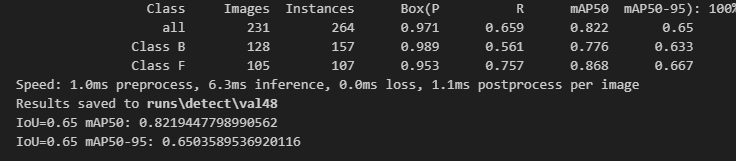

## RetinaNet

### Setup 

The PyTorch RetinaNet implementation from this link will be used: https://github.com/yhenon/pytorch-retinanet

In [ ]:
!git clone https://github.com/yhenon/pytorch-retinanet

### Base Model

In [13]:
# Training
%cd C:\Users\Jerome\anaconda3\CPE313_MONTOJO\pytorch-retinanet
!python train.py --dataset coco --coco_path "C:\Users\Jerome\anaconda3\CPE313_MONTOJO\APOY 2 COCO" --depth 50 --epochs 5

C:\Users\Jerome\anaconda3\CPE313_MONTOJO\pytorch-retinanet
CUDA available: True
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Num training images: 544
CUDA available: True
CUDA available: True
CUDA available: True
Epoch: 0 | Iteration: 0 | Classification loss: 2.96009 | Regression loss: 0.56314 | Running loss: 3.52322
Epoch: 0 | Iteration: 1 | Classification loss: 1.28138 | Regression loss: 0.93375 | Running loss: 2.86918
Epoch: 0 | Iteration: 2 | Classification loss: 1.21886 | Regression loss: 1.14611 | Running loss: 2.70111
Epoch: 0 | Iteration: 3 | Classification loss: 3.45100 | Regression loss: 0.00000 | Running loss: 2.88858
Epoch: 0 | Iteration: 4 | Classification loss: 2.69258 | Regression loss: 0.00000 | Running loss: 2.84938
Epoch: 0 | Iteration: 5 | Classification loss: 1.12188 | Regression loss: 1.02533 | Running loss: 2.73235
Epoch: 0 | Iteration: 6 | Clas

### Hyperparameter Tuning

In [1]:
%cd C:\Users\Jerome\anaconda3\CPE313_MONTOJO\pytorch-retinanet
# Increased epochs to 50 for better training and also changed depth to 101 to make it more accurate.
# Adam and ReduceLROnPlateau optimizer was used for better training.
!python train.py --dataset coco --coco_path "C:/Users/Jerome/anaconda3/CPE313_MONTOJO/COCO_DATASET_FIRE_2" --depth 101 --epochs 25

C:\Users\Jerome\anaconda3\CPE313_MONTOJO\pytorch-retinanet
CUDA available: True
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Num training images: 1636
CUDA available: True
CUDA available: True
CUDA available: True
Epoch: 0 | Iteration: 0 | Classification loss: 1.40361 | Regression loss: 0.90093 | Running loss: 2.30454
Epoch: 0 | Iteration: 1 | Classification loss: 1.25881 | Regression loss: 1.00572 | Running loss: 2.28454
Epoch: 0 | Iteration: 2 | Classification loss: 1.38673 | Regression loss: 1.31907 | Running loss: 2.42496
Epoch: 0 | Iteration: 3 | Classification loss: 1.31322 | Regression loss: 0.91630 | Running loss: 2.37610
Epoch: 0 | Iteration: 4 | Classification loss: 1.30577 | Regression loss: 1.00424 | Running loss: 2.36288
Epoch: 0 | Iteration: 5 | Classification loss: 1.24084 | Regression loss: 1.04297 | Running loss: 2.34970
Epoch: 0 | Iteration: 6 | Cla

### Conclusion

Result of Adam

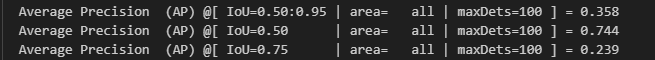

Result of AdamW:


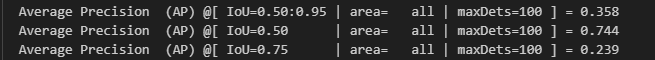

Result of SGD:

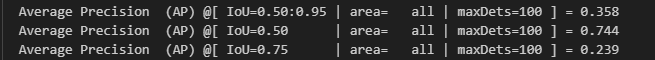

## RT-DETR

Since the model training and development were conducted in Google Colab, I am able to provide the link to the Colab notebook along with the image dataset, enabling replication of the entire modeling process within a single Jupyter notebook.

Link to the colab notebook: https://colab.research.google.com/drive/1Bj2DJ6ZFIpuvtVImaQODrXMgEp8jXmIc?usp=sharing

### Setup

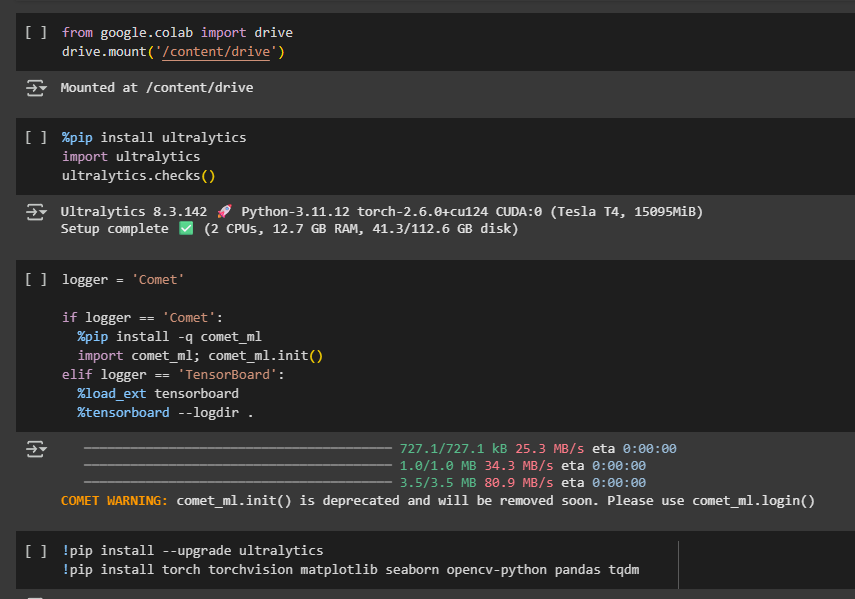

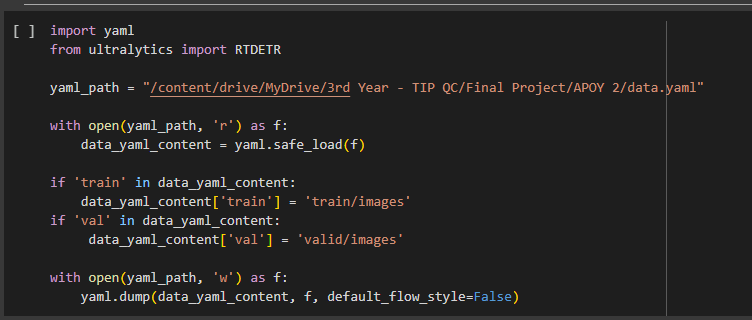

### Base Model

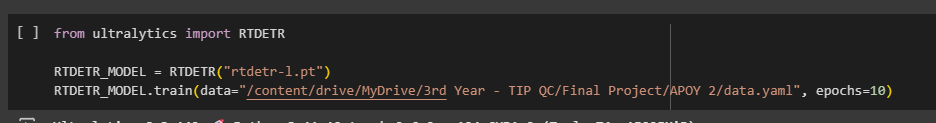

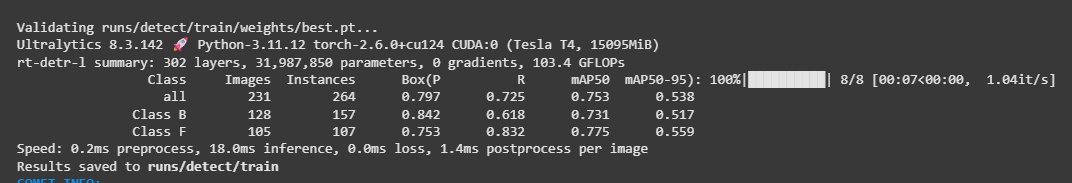

### Hyperparameter Tuning

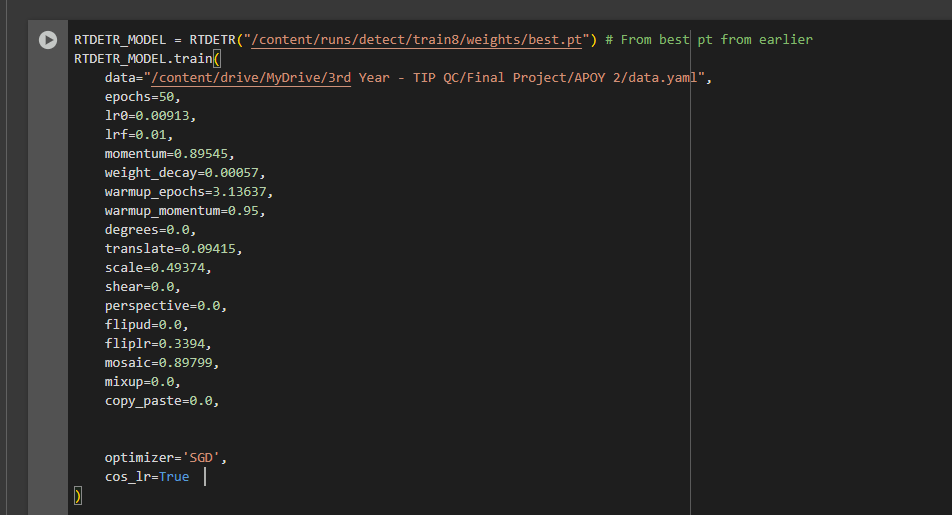

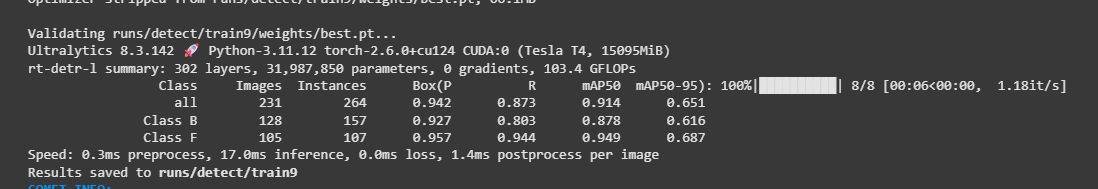

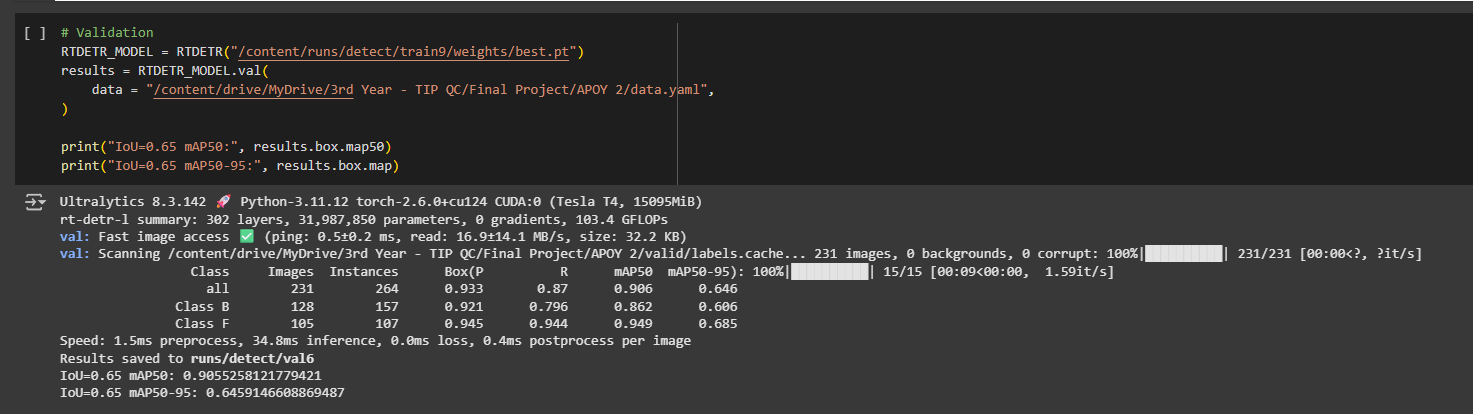